In [3]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

<ipython-input-3-5b489f4d910b>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

df_train = pd.read_csv('dataset/sales_train.csv')

In [13]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
print(df_train.shape)
df_train.dtypes

(2935849, 6)


date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [6]:
df_train = df_train.groupby(['date_block_num' , 'shop_id' , 'item_id']).agg({'item_cnt_day': 'sum'}).reset_index()
df_train.head()
#df_train.tail(20)

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [7]:
df_train = df_train.groupby(['date_block_num']).agg({'item_cnt_day': 'sum'})
df_train.head(35)

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0
5,125381.0
6,116966.0
7,125291.0
8,133332.0


In [8]:
max(df_train['item_cnt_day'])
#min(df_train['item_cnt_day'])

183342.0

<AxesSubplot:xlabel='date_block_num'>

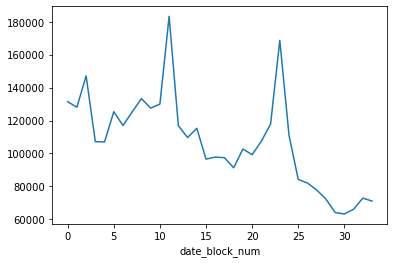

In [9]:
df_train['item_cnt_day'].plot(kind='line')

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [73]:
#result = seasonal_decompose(df_train['item_cnt_day'], model="multiplicative", freq=12,extrapolate_trend='freq')
result = seasonal_decompose(df_train['item_cnt_day'], model="additive", freq=12,extrapolate_trend='freq')

<ipython-input-73-8e17251441c8>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df_train['item_cnt_day'], model="additive", freq=12,extrapolate_trend='freq')


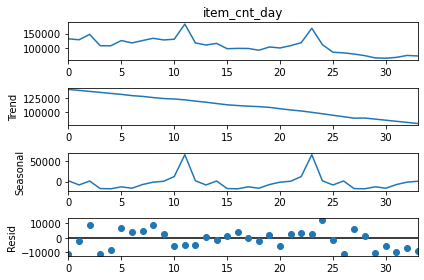

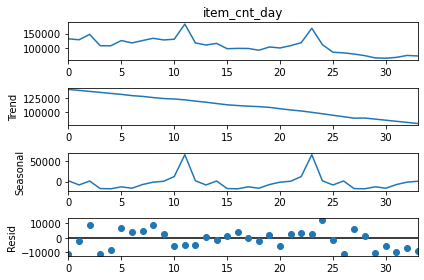

In [74]:
result.plot()

In [75]:
seasonal = pd.DataFrame(result.seasonal)
seasonal.head()
#seasonal.plot()

,seasonal
date_block_num,
0,1822.556652
1,-8469.436258
2,1282.431944
3,-17456.241522
4,-17999.298081


In [76]:
trend= pd.DataFrame(result.trend)
trend.head(10)

,trend
date_block_num,
0,140796.355721
1,139006.292784
2,137216.229847
3,135426.166909
4,133636.103972
5,131846.041035
6,129620.250000
7,128245.958333
8,126152.291667


In [78]:
residual = pd.DataFrame(result.resid)
residual.head(33)

,resid
date_block_num,
0,-11139.912373
1,-2446.856526
2,8643.338210
3,-10779.925388
4,-8666.805891
5,6622.981745
6,3917.199224
7,4516.000457
8,8719.121135


In [79]:
train=trend[:25]
test=trend[25:]

In [85]:
# !pip3 install pyramid-arima
import pmdarima as pm
smodel = pm.auto_arima(trend.trend, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=1,
                         seasonal=False,
                         d=None, D=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.456, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=521.399, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=523.552, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=523.464, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=519.401, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.308 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   34
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -258.700
Date:                Wed, 15 Sep 2021   AIC                            519.401
Time:                        17:39:42   BIC                            520.866
Sample:                             0   HQIC                           519.886
                                 - 34                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.138e+05   8.26e+04      7.431      0.000    4.52e+05    7.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.73   Jarque-Bera (JB):                35.11
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               3.93   Skew:                             0.80
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

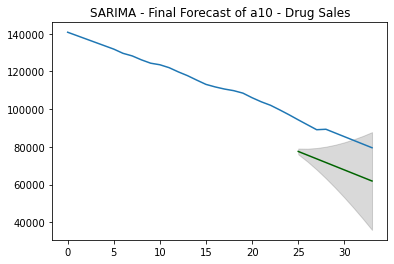

In [86]:
# Forecast
n_periods = 9
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)


# make series for plotting purpose
fitted_series = pd.Series(fitted, index=test.index)
lower_series = pd.Series(confint[:, 0], index=test.index)
upper_series = pd.Series(confint[:, 1], index=test.index)

# Plot
plt.plot(trend.trend)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [90]:
import numpy as np
#Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
   # corr = np.corrcoef(forecast, actual)[0,1]   # corr
   
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, })

forecast_accuracy(fitted, test.values)

{'mape': 0.19487827414192258,
 'me': -17124.90551346798,
 'mae': 17124.90551346798,
 'mpe': -0.19487827414192258,
 'rmse': 18428.854565150537}